# 1) Data Wrangling
In this section, we familiarize ourselves with the data, perform necessary cleaning, and create a resampled dataset with a balanced target distribution. Additionally, we ensure that variables demonstrate statistical significance in relation to the target variable.

In [1]:
import numpy as np
import pandas as pd

## Overview
The dataset under analysis contains a large number of entries and exhibits an imbalanced distribution of the target variable, `'Response'`. There are no missing values or duplicate records within the dataset. Initial data cleaning procedures are conducted in this subsection to enhance data quality. Descriptive statistics are provided to offer a comprehensive overview of the dataset, followed by some essential metadata.

Function `columns_info()` indicating features' basic metadata and descriptive statistics for a given df, is defined in order to facilitate analysis.

In [2]:
def columns_info(df):
    # features' basic metadata and descriptive statistics for a given df
    feature_info = {
        'feature': [],
        'dtype': [],
        'nunique': [],
        'min': [],
        '25%': [],
        '50%': [],
        '75%': [],
        'max': [],
        'mean': [],
        'std_dev': []
        }

    for col in df.columns:
        feature_info['feature'].append(col)
        feature_info['dtype'].append(df[col].dtype)
        feature_info['nunique'].append(len(df[col].unique()))
        if df[col].dtype=='object':
            feature_info['min'].append(np.nan)
            feature_info['25%'].append(np.nan)
            feature_info['50%'].append(np.nan)
            feature_info['75%'].append(np.nan)
            feature_info['max'].append(np.nan)
            feature_info['mean'].append(np.nan)
            feature_info['std_dev'].append(np.nan)
        else:
            feature_info['min'].append(df[col].min())
            feature_info['25%'].append(df[col].quantile(0.25))
            feature_info['50%'].append(df[col].median())
            feature_info['75%'].append(df[col].quantile(0.75))
            feature_info['max'].append(df[col].max())
            feature_info['mean'].append(df[col].mean())
            feature_info['std_dev'].append(df[col].std())

    features = pd.DataFrame(feature_info)
    features.set_index('feature', inplace=True)
    return features

In [3]:
%%time
train = pd.read_csv('/home/petewojtczak/Desktop/auto_insurance_clf/train.csv')
train

CPU times: user 6.42 s, sys: 621 ms, total: 7.04 s
Wall time: 7.04 s


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6.0,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36.0,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32.0,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28.0,0,1-2 Year,Yes,48443.0,26.0,274,1


In [4]:
# basic info
print(f'Number of rows: {train.shape[0]}')
print(f'Number of columns: {train.shape[1]}')
print(f'Data types: {set(train.dtypes.values)}')
print(f'Missing values: {train.isnull().values.any()}')
print(f"Duplicates: {train.drop(columns='id').duplicated().sum()}")

Number of rows: 11504798
Number of columns: 12
Data types: {dtype('O'), dtype('int64'), dtype('float64')}
Missing values: False
Duplicates: 0


In [5]:
# imbalanced target variable
train.Response.value_counts(normalize=True)

0    0.877003
1    0.122997
Name: Response, dtype: float64

In [6]:
# features
pd.set_option('display.float_format', lambda x: '%.2f' % x)
columns_info(train).sort_values(by='nunique', ascending=False)

,dtype,nunique,min,25%,50%,75%,max,mean,std_dev
feature,,,,,,,,,
id,int64,11504798,0.00,2876199.25,5752398.50,8628597.75,11504797.00,5752398.50,3321149.26
Annual_Premium,float64,51728,2630.00,25277.00,31824.00,39451.00,540165.00,30461.37,16454.75
Vintage,int64,290,10.00,99.00,166.00,232.00,299.00,163.90,79.98
Policy_Sales_Channel,float64,152,1.00,29.00,151.00,152.00,163.00,112.43,54.04
Age,int64,66,20.00,24.00,36.00,49.00,85.00,38.38,14.99
Region_Code,float64,54,0.00,15.00,28.00,35.00,52.00,26.42,12.99
Vehicle_Age,object,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,object,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driving_License,int64,2,0.00,1.00,1.00,1.00,1.00,1.00,0.04


## Cleaning
Some essential cleaning conclusions are drawn and applied here.

In [7]:
train.Region_Code.value_counts().tail(2)

51.00    1880
39.20       1
Name: Region_Code, dtype: int64

In [8]:
train = train.drop(index=train[train.Region_Code==39.2].index)

In [9]:
# data cleaning
def data_clean(raw_data):
    # returns raw_data as clean as we want it 
    raw_data.set_index('id', inplace=True)
    # according to 'columns_info(train)' this feature is invariant
    raw_data.drop(columns=['Driving_License'], inplace=True)
    # according to 'columns_info(train)' this feature is nominal
    raw_data.Previously_Insured = raw_data.Previously_Insured.astype(str)    
    return raw_data

data_clean(train)

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,
0,Male,21,35.00,0,1-2 Year,Yes,65101.00,124.00,187,0
1,Male,43,28.00,0,> 2 Years,Yes,58911.00,26.00,288,1
2,Female,25,14.00,1,< 1 Year,No,38043.00,152.00,254,0
3,Female,35,1.00,0,1-2 Year,Yes,2630.00,156.00,76,0
4,Female,36,15.00,1,1-2 Year,No,31951.00,152.00,294,0
...,...,...,...,...,...,...,...,...,...,...
11504793,Male,48,6.00,0,1-2 Year,Yes,27412.00,26.00,218,0
11504794,Female,26,36.00,0,< 1 Year,Yes,29509.00,152.00,115,1
11504795,Female,29,32.00,1,< 1 Year,No,2630.00,152.00,189,0


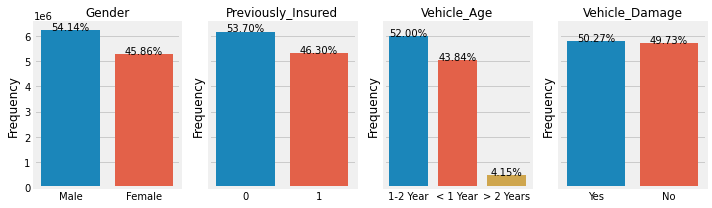

CPU times: user 18.7 s, sys: 1.38 s, total: 20 s
Wall time: 19.9 s


In [10]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# nominal features frequency check
fig, axes = plt.subplots(1, 4, figsize=(10, 3), sharey=True)

for ax, feature in zip(axes, train.select_dtypes(include='object').columns):
    sns.countplot(x=feature, data=train, ax=ax, order=train[feature].value_counts().index)
    total = len(train[feature])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total:.2%}', ha='center')

for ax, feature in zip(axes, train.select_dtypes(include='object').columns):
    ax.set_title(f'{feature}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

There is sufficient frequency for meaningful statistical analysis with `chi2_contingency`.

## Sampling
In this subsection, a dataframe named `df_train` is constructed from the original data to achieve a balanced distribution of the target variable.

In [11]:
# rebalanced dataset df_train
train_1 = train[train.Response==1]
train_0 = train[train.Response==0].sample(train_1.shape[0])
df_train = pd.concat([train_0, train_1])
print(df_train.shape)
df_train.Response.value_counts(normalize=True)

(2830118, 10)


0   0.50
1   0.50
Name: Response, dtype: float64

In [12]:
%%time
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu, chi2_contingency

# train/test split
y = df_train['Response']
X = df_train.drop('Response', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df_train['Response'])
df_train = pd.concat([X_train, y_train], axis=1)

CPU times: user 2.19 s, sys: 188 ms, total: 2.37 s
Wall time: 2.37 s


## Features Summary

In [13]:
len(X_train.columns)

9

In [14]:
continous_features = ['Annual_Premium']
nominal_features = list(X_train.select_dtypes(include='object').columns)
ordinal_features =  ['Age', 'Policy_Sales_Channel', 'Vintage']
target_encoded_feature = ['Region_Code']

print(f"continous_features: {continous_features}")
print(f"nominal_features: {nominal_features}")
print(f"ordinal_features: {ordinal_features}")
print(f"target_encoded_feature: {target_encoded_feature}")

len(continous_features)+len(target_encoded_feature)+len(nominal_features)+len(ordinal_features)

continous_features: ['Annual_Premium']
nominal_features: ['Gender', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']
ordinal_features: ['Age', 'Policy_Sales_Channel', 'Vintage']
target_encoded_feature: ['Region_Code']


9

## Significance Testing

In [15]:
%%time
numeric_features = continous_features + ordinal_features
# numeric features testing
for feature in numeric_features:
    group_0 = df_train[df_train['Response']==0][feature]
    group_1 = df_train[df_train['Response']==1][feature]
    stat, p = mannwhitneyu(group_0, group_1, alternative='two-sided')
    if p < 0.05:
        print('*Feature {} is statistically significant'.format(feature))
        
# nominal features testing
for feature in nominal_features:
    contingency_table = pd.crosstab(df_train[feature], df_train['Response'])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print('+Feature {} is statistically significant'.format(feature))
print('\n')

*Feature Annual_Premium is statistically significant
*Feature Age is statistically significant
*Feature Policy_Sales_Channel is statistically significant
*Feature Vintage is statistically significant
+Feature Gender is statistically significant
+Feature Previously_Insured is statistically significant
+Feature Vehicle_Age is statistically significant
+Feature Vehicle_Damage is statistically significant


CPU times: user 3.37 s, sys: 247 ms, total: 3.62 s
Wall time: 3.59 s


# 2) ML with sklearn
This section forms the core of the notebook, where we explore and identify an optimal model that fits the data well. The approach involves drawing a small sample and conducting a grid search using several sklearn algorithms to identify a particularly effective model. The identified model will subsequently be trained on a larger dataset to further enhance its performance. Some seemingly nominal features, such as `'Region_Code'` and `'Policy_Sales_Channel'`, are processed in a customized manner, ensuring that no sparse matrix problems will appear. For each algo, the fitted model is stored in the `models` dictionary.

In [16]:
# small data sample 
sample = df_train.sample(n=8800) 
df_train = df_train.drop(sample.index)
print(sample.shape)
sample.Response.value_counts(normalize=True)

(8800, 10)


0   0.50
1   0.50
Name: Response, dtype: float64

## Setup and Training

In [17]:
%%time
import time
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, TargetEncoder
from sklearn.compose import make_column_transformer

from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

prep = make_column_transformer((StandardScaler(), continous_features),
                               (TargetEncoder(), target_encoded_feature),
                               (OneHotEncoder(drop='first'), nominal_features),
                               (MinMaxScaler(), ordinal_features))
# pipelines
pipelines = {
    'logreg': make_pipeline(prep, LogisticRegression()),
    'forest': make_pipeline(prep, RandomForestClassifier(LogisticRegression())),
    'knn': make_pipeline(prep, KNeighborsClassifier())}

# hyperspace to gridsearch
hypergrid = {
    'logreg': {
        'logisticregression__C': [1.4, 2, 2.6, 4, 5.7, 7.8],
        'logisticregression__solver': ['lbfgs', 'liblinear']
    },
    'forest': {
        'randomforestclassifier__n_estimators': [72, 96, 124, 164, 221],
        'randomforestclassifier__criterion': ['gini', 'entropy'],
        'randomforestclassifier__min_samples_leaf': [12, 18, 36, 64, 88]
    },
    'knn': {
        'kneighborsclassifier__n_neighbors': list(range(5, 51, 5)),
        'kneighborsclassifier__weights': ['uniform', 'distance']
    }}

print('Training successfully initialized.\n')

# training
models = {}
for algo, pipeline in pipelines.items():
    print('* starting training for {}...'.format(algo))
    start = time.time()
    
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, scoring='roc_auc')
    model.fit(sample.drop('Response', axis=1), sample.Response)
    models[algo] = model
    
    end = time.time()
    print('  {} model fitted. ({:.2f} s)'.format(algo, end-start))
print('\n')

Training successfully initialized.

* starting training for logreg...
  logreg model fitted. (6.20 s)
* starting training for forest...
  forest model fitted. (376.73 s)
* starting training for knn...
  knn model fitted. (12.27 s)


CPU times: user 6min 37s, sys: 14.2 s, total: 6min 51s
Wall time: 6min 35s


## ML Performance Summary
This subsection summarizes the predictive performance of the models stored in the `models` dictionary. `Sensitivity`, `specificity`, and `AUC` are calculated for the large testing data, `X_test` and`y_test`.

In [18]:
from sklearn.metrics import roc_auc_score, confusion_matrix

y_test_summary = pd.DataFrame()

for algo in pipelines.keys():
    y_pred = models[algo].predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    y_test_summary.loc[algo,['Sensitivity']] = round(TP/float(TP + FN), 3)
    y_test_summary.loc[algo,['Specificity']] = round(TN/float(TN + FP), 3)
    y_pred = models[algo].predict_proba(X_test)[:, 1]
    y_test_summary.loc[algo,['AUC']] = roc_auc_score(y_test, y_pred)

print('Predictions perspectives (sklearn algos):')
y_test_summary.sort_values(by='AUC', ascending=False)

Predictions perspectives (sklearn algos):


,Sensitivity,Specificity,AUC
forest,0.93,0.67,0.85
logreg,0.96,0.60,0.84
knn,0.93,0.65,0.84


# 3) Best Model
Here, we investigate further `RandomForestClassifier`.

In [19]:
models['forest'].best_params_

{'randomforestclassifier__criterion': 'entropy',
 'randomforestclassifier__min_samples_leaf': 36,
 'randomforestclassifier__n_estimators': 221}

In [20]:
%%time
best_params = models['forest'].best_params_

prep = make_column_transformer((StandardScaler(), continous_features),
                               (TargetEncoder(), target_encoded_feature),
                               (OneHotEncoder(drop='first'), nominal_features),
                               (MinMaxScaler(), ordinal_features))

pipe = make_pipeline(prep, RandomForestClassifier(n_estimators = models['forest'].best_params_['randomforestclassifier__n_estimators'],
                                                  criterion = models['forest'].best_params_['randomforestclassifier__criterion'],
                                                  min_samples_leaf = models['forest'].best_params_['randomforestclassifier__min_samples_leaf']))

pipe.fit(X_train, y_train)

CPU times: user 11min 4s, sys: 2.4 s, total: 11min 6s
Wall time: 11min 10s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Annual_Premium']),
                                                 ('targetencoder',
                                                  TargetEncoder(),
                                                  ['Region_Code']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Previously_Insured',
                                                   'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_leaf=36,
                                        n_estimators=221))])

## Best Model Evaluation

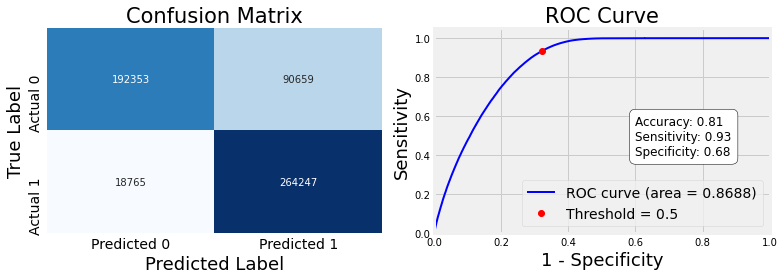

In [21]:
from sklearn.metrics import roc_curve, auc

# Compute confusion matrix
cm = confusion_matrix(y_test, pipe.predict(X_test))

# Compute ROC curve and AUC
y_pred_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Compute accuracy, sensitivity and specificity
accuracy = (cm[0, 0] + cm[1, 1]) / np.sum(cm)
default_threshold_index = np.where(thresholds > 0.5)[0][-1]
sensitivity = tpr[default_threshold_index]
specificity = 1 - fpr[default_threshold_index]

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Confusion Matrix subplot
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'], 
            cbar=False, 
            ax=axes[0])

axes[0].set_title('Confusion Matrix', fontsize=21)
axes[0].set_xlabel('Predicted Label', fontsize=18)
axes[0].set_ylabel('True Label', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)

# ROC Curve subplot
axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
axes[1].legend(loc="lower right", fontsize=14)
axes[1].text(0.6, 0.4, f'Accuracy: {accuracy:.2f}\nSensitivity: {sensitivity:.2f}\nSpecificity: {specificity:.2f}', 
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'), 
             fontsize=12)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('1 - Specificity', fontsize=18)
axes[1].set_ylabel('Sensitivity', fontsize=18)
axes[1].set_title('ROC Curve', fontsize=21)
axes[1].plot(fpr[default_threshold_index], tpr[default_threshold_index], 'ro', label='Threshold = 0.5')
axes[1].legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.show()

In [22]:
# threshold tuning
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.504092826968636

## Best Model Refit
It's best to utilize all available training data before making predictions.

In [23]:
%%time
pipe.fit(X, y)

CPU times: user 25min 50s, sys: 1.13 s, total: 25min 51s
Wall time: 25min 51s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Annual_Premium']),
                                                 ('targetencoder',
                                                  TargetEncoder(),
                                                  ['Region_Code']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender',
                                                   'Previously_Insured',
                                                   'Vehicle_Age',
                                                   'Vehicle_Damage']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['Age',
                                                   'Policy_Sales_Channel',
                                                   'Vintage'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy',
                                        min_samples_leaf=36,
                                        n_estimators=221))])

# 4) Submission

In [24]:
%%time
test = pd.read_csv('/home/petewojtczak/Desktop/auto_insurance_clf/test.csv')

y_hat = pipe.predict_proba(data_clean(test))[:, 1]
submission = pd.DataFrame(test.reset_index().id).assign(Response=y_hat)
submission

CPU times: user 5min 13s, sys: 9.59 s, total: 5min 22s
Wall time: 5min 22s


,id,Response
0,11504798,0.09
1,11504799,0.78
2,11504800,0.67
3,11504801,0.00
4,11504802,0.23
...,...,...
7669861,19174659,0.58
7669862,19174660,0.00
7669863,19174661,0.00
7669864,19174662,0.90
